In [1]:
# Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
# information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
# resting blood pressure, serum cholesterol, and maximum heart rate achieved.
# Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
# usp=share_link
# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
# numerical features if necessary.

import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# No Encoding is required as all dataypes are already in numerical format also random forest does not require feature scaling
# I don't have to encoded the categorical variables because there are not such a categorical value.


In [6]:
X = df.drop(labels=['target'],axis=1)
y = df.target

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
# Q2. Split the dataset into a training set (70%) and a test set (30%).
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
# tree. Use the default values for other hyperparameters.
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,max_depth=10)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [11]:
# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
# predication
# base model
# Creating a function to evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(X,y,model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(f'Accuracy Score  : {acc:.4f}')
    print(f'Precision Score : {pre:.4f}')
    print(f'Recall Score    : {rec:.4f}')
    print(f'F1 Score        : {f1:.4f}')
    return acc, pre, rec, f1

In [12]:
acc_base,pre_base,rec_base,f1_base = evaluate_model(X_train,y_train,RFC)

Accuracy Score  : 0.8022
Precision Score : 0.8333
Recall Score    : 0.8000
F1 Score        : 0.8163


In [13]:
# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
# disease risk. Visualise the feature importances using a bar chart.
RFC.feature_importances_

array([0.08104641, 0.03203078, 0.10631236, 0.07798012, 0.07118309,
       0.0117843 , 0.01675555, 0.09343003, 0.0678317 , 0.11560248,
       0.05357397, 0.15453801, 0.1179312 ])

In [14]:
RFC.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [15]:
important = pd.Series(RFC.feature_importances_)
important.index = RFC.feature_names_in_
important_final = important.sort_values(ascending=False)
important_final

ca          0.154538
thal        0.117931
oldpeak     0.115602
cp          0.106312
thalach     0.093430
age         0.081046
trestbps    0.077980
chol        0.071183
exang       0.067832
slope       0.053574
sex         0.032031
restecg     0.016756
fbs         0.011784
dtype: float64

In [16]:
top5 = list(important[0:5].index)
print('The top 5 most important features in predicting heart disease risk :',top5)

The top 5 most important features in predicting heart disease risk : ['age', 'sex', 'cp', 'trestbps', 'chol']


<AxesSubplot: title={'center': 'Feature Importances Plot'}>

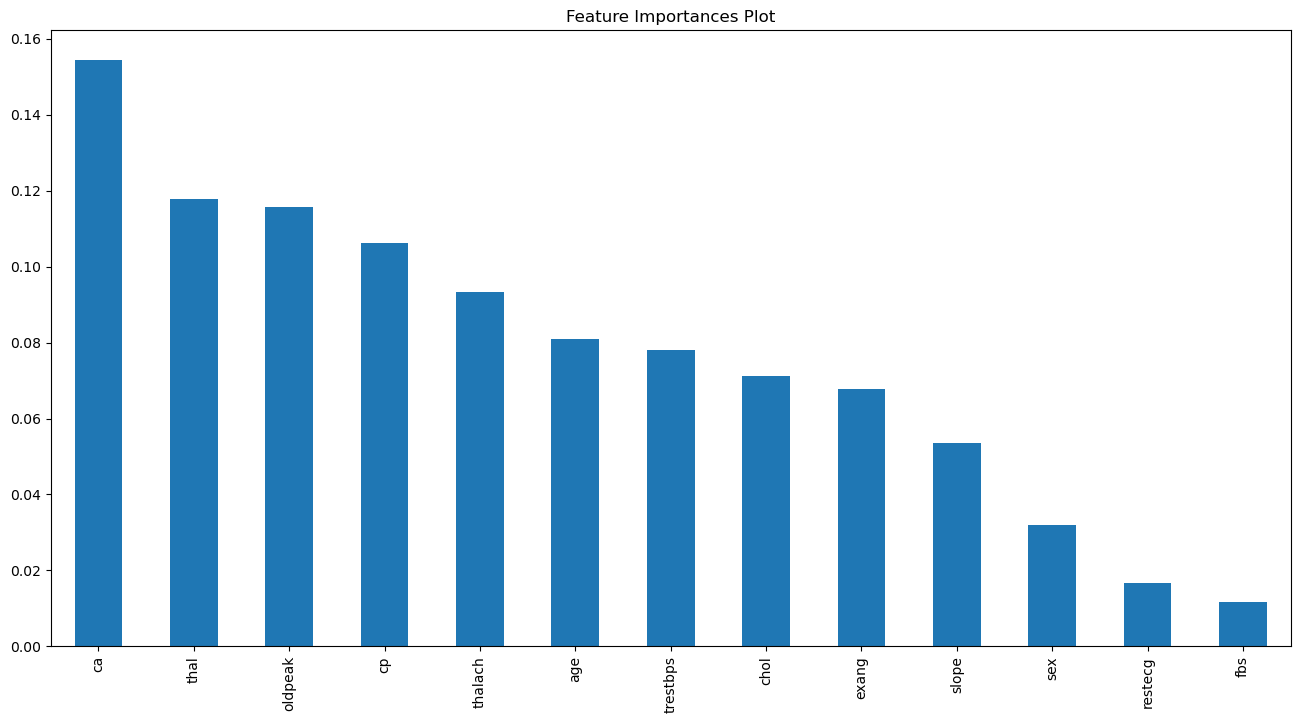

In [17]:
import matplotlib.pyplot as plt
important_final.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

In [18]:
# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
# different values of the number of trees, maximum depth, minimum samples split, and minimum samples
# leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

# Using Randomizedsearchcv
param = {
    'n_estimators' : [100,200,300,400],
    'max_depth' : [10,20,30,None],
    'min_samples_split' : [2,3,5,6],
    'min_samples_leaf' : [1,2,5]
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV
RScv = RandomizedSearchCV(RandomForestClassifier(),param_distributions=param,scoring='accuracy',cv=5,verbose=3)
RScv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.714 total time=   0.4s
[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.905 total time=   0.4s
[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.762 total time=   0.4s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.837 total time=   0.8s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.860 total time=   0.8s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.714 total ti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 3, 5, 6],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy', verbose=3)

In [23]:
RScv.best_score_

0.8345514950166113

In [24]:
# Q7. Report the best set of hyperparameters found by the search and the corresponding performance
# metrics. Compare the performance of the tuned model with the default model.


In [25]:
RScv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 30}

In [26]:
y_pred = RScv.predict(X_test)

In [27]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1])

In [28]:
# Tuned model
print('Result for Tunned Model :')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(y_test,y_pred,RScv)

Result for Tunned Model :
Accuracy Score  : 0.8242
Precision Score : 0.8269
Recall Score    : 0.8600
F1 Score        : 0.8431


In [29]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc_base,pre_base,rec_base,f1_base],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [30]:
df = pd.DataFrame(dct)
df

,metrics,base model,tuned model
0,accuracy,0.802198,0.824176
1,precision,0.833333,0.826923
2,recall,0.800000,0.860000
3,f1,0.816327,0.843137


# All parameter is incresed of Tunned model score

In [34]:
# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
# decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
# limitations of the model for predicting heart disease risk.

best_RCF = RScv.best_estimator_
best_RCF

RandomForestClassifier(max_depth=30, min_samples_leaf=5)

In [44]:
important_tunned = best_RCF.feature_importances_
important = pd.Series(important_tunned)
important.index = best_RCF.feature_names_in_
important_tun = important.sort_values(ascending=False)
important_tun

ca          0.218789
thal        0.154900
cp          0.143527
oldpeak     0.104789
thalach     0.094822
exang       0.076842
slope       0.050270
age         0.046698
chol        0.040672
trestbps    0.033320
sex         0.025814
restecg     0.007035
fbs         0.002521
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances Plot'}>

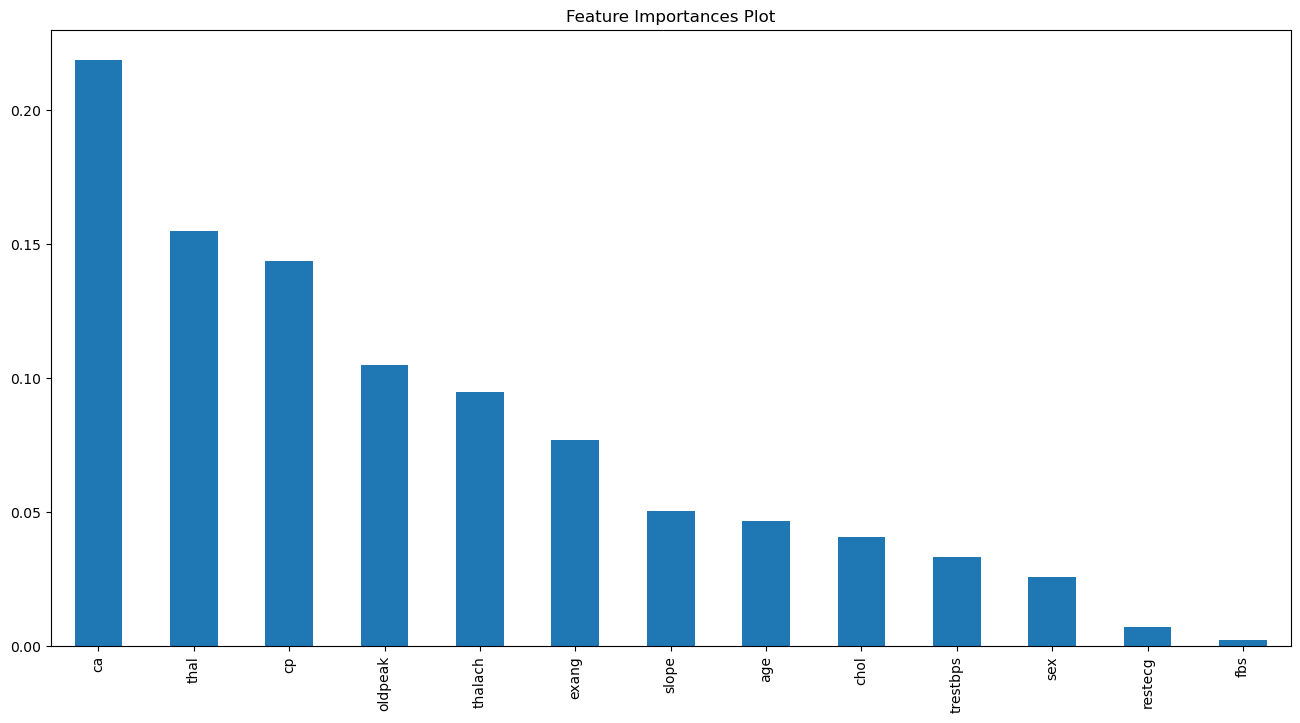

In [45]:
import matplotlib.pyplot as plt
important_tun.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

In [48]:
top2 = X_train[['ca','thal']]
top2.head()

,ca,thal
124,0,2
72,0,2
15,0,2
10,0,2
163,4,2


In [56]:
df_top2 =pd.concat([top2,y_train],axis=1)
df_top2.head()

,ca,thal,target
124,0,2,1
72,0,2,1
15,0,2,1
10,0,2,1
163,4,2,1


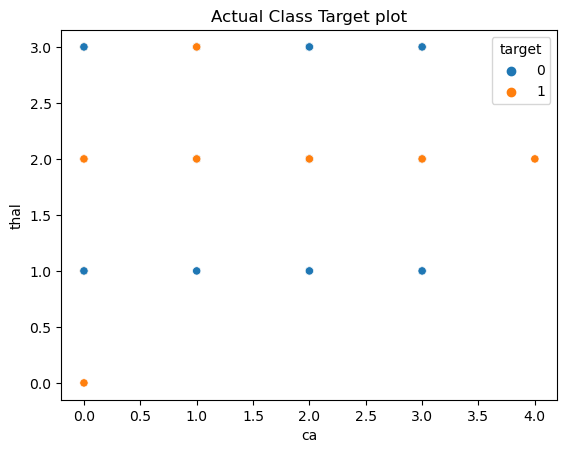

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='thal',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [61]:
df_top2['predicated'] = best_RCF.predict(X_train)

In [68]:
df_top2.head()

,ca,thal,target,predicated
124,0,2,1,1
72,0,2,1,1
15,0,2,1,1
10,0,2,1,1
163,4,2,1,1


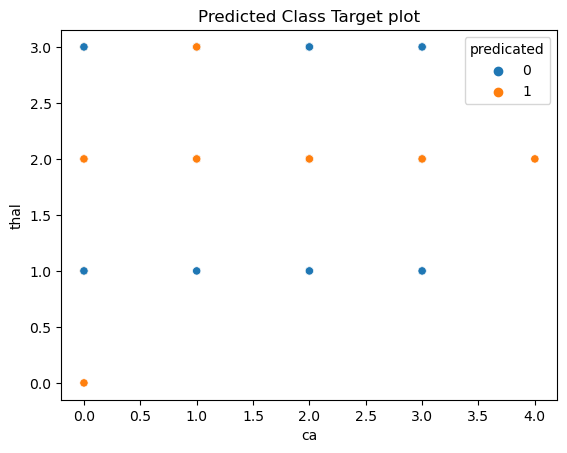

In [70]:
sns.scatterplot(data=df_top2,x='ca',y='thal',hue='predicated')
plt.title('Predicted Class Target plot')
plt.show()